In [397]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import glob
masterdir = '/Users/law232/Desktop/Observations 2016-17/2016-10-18/'
workingdir = masterdir+'working/'

In [398]:
cal_files = glob.glob(workingdir+'cal_*.fits')
cal_files = sorted(cal_files) # Not necessary, but orders filenames.
print('There are {0} calibrated image files: '.format(len(cal_files)))
cal_files[0:5]

There are 310 calibrated image files: 


['/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0042.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0043.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0044.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0045.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0046.fits']

In [399]:
import sys
! pip install astroalign

Defaulting to user installation because normal site-packages is not writeable


In [400]:
import astroalign as aa

In [401]:
reference_image_name = 'cal_CCD_Image_0420.fits'
reference_image = fits.open(workingdir+reference_image_name)
reference_image_data = reference_image[0].data
reference_image_head = reference_image[0].header
reference_image.close()

In [402]:
hdu = fits.PrimaryHDU(data=reference_image_data, header=reference_image_head)
hdu.writeto(workingdir+'ref_'+reference_image_name, overwrite=True)

In [403]:
def align_images(source_image_name, reference_image_data):
    #open the source image (to be aligned).
    source_image = fits.open(source_image_name)
    source_image_data = source_image[0].data
    source_image_head = source_image[0].header
    source_image.close()
    # Align the source image to the reference image.
    print("Aligning ",source_image_name)
    source = np.array(source_image_data).byteswap().newbyteorder()
    reference = np.array(reference_image_data).byteswap().newbyteorder()
    aligned, footprint = aa.register(source,reference) # Align the images.
    # Save the aligned image to a new filename, beginning with 'al_'.
    aligned_image_name = source_image_name.replace('/cal_', '/al_cal_')
    hdu = fits.PrimaryHDU(data=aligned, header=source_image_head)
    hdu.header["Aligned"] = True 
    # Add a new line of info in the HEADER.
    outfile = aligned_image_name
    hdu.writeto(outfile,overwrite=True)

In [404]:
num_files = len(cal_files)
for i, source_image_name in enumerate(cal_files[0:]): # First 5 images, e.g.
    print("Image {0}/{1}".format(i+1,num_files))
    align_images(source_image_name, reference_image_data)

Image 1/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0042.fits
Image 2/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0043.fits
Image 3/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0044.fits
Image 4/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0045.fits
Image 5/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0046.fits
Image 6/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0047.fits
Image 7/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0048.fits
Image 8/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0049.fits
Image 9/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0050.fits
Image 10/310
Aligning  /User

Image 77/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0132.fits
Image 78/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0133.fits
Image 79/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0134.fits
Image 80/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0135.fits
Image 81/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0136.fits
Image 82/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0137.fits
Image 83/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0138.fits
Image 84/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0139.fits
Image 85/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0140.fits
Image 86/310
Aligni

Image 152/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0248.fits
Image 153/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0249.fits
Image 154/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0250.fits
Image 155/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0251.fits
Image 156/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0252.fits
Image 157/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0253.fits
Image 158/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0254.fits
Image 159/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0255.fits
Image 160/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0256.fits
Image 161/

Image 227/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0324.fits
Image 228/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0325.fits
Image 229/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0326.fits
Image 230/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0327.fits
Image 231/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0328.fits
Image 232/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0329.fits
Image 233/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0330.fits
Image 234/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0344.fits
Image 235/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0345.fits
Image 236/

Image 302/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0412.fits
Image 303/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0413.fits
Image 304/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0414.fits
Image 305/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0415.fits
Image 306/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0416.fits
Image 307/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0417.fits
Image 308/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0418.fits
Image 309/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0419.fits
Image 310/310
Aligning  /Users/law232/Desktop/Observations 2016-17/2016-10-18/working/cal_CCD_Image_0420.fits


In [405]:
wcsfile = fits.open(workingdir+'WCS_cal_CCD_Image_0420.fits')
wcs_data = wcsfile[0].data

In [406]:
wcs_head = wcsfile[0].header
wcsfile.close()

In [407]:
from astropy.wcs import WCS
wcs_info = WCS(wcs_head)
wcs_info

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 300.77157436  59.0126157185  
CRPIX : 718.916687012  257.684820175  
CD1_1 CD1_2  : -0.000258397533893  -3.03822636441e-05  
CD2_1 CD2_2  : 2.96053642244e-05  -0.000258519574207  
NAXIS : 0  0

In [408]:
al_file_name = workingdir+'cal_CCD_Image_0091.fits'

In [409]:
al_image = fits.open(al_file_name)
al_image_data = al_image[0].data
al_image_head = al_image[0].header
al_image.close()

/Users/Shared/conda/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


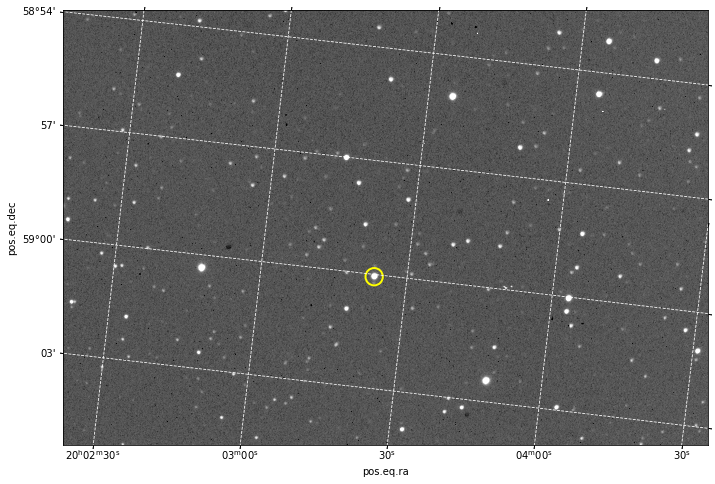

In [410]:
from matplotlib.colors import LogNorm
plt.figure(figsize = (14, 8))
norm = LogNorm()
vmin = np.percentile(al_image_data.flatten(),0.1)
vmax = np.percentile(al_image_data.flatten(),99.9) # Here's where we give the WCS info to subplot.
ax = plt.subplot(projection = wcs_info)
ax.imshow(al_image_data, cmap='Greys_r', norm=norm, vmin=vmin, vmax=vmax)
# Plot a grid, to show sky coordinate directions.
ax.grid(color='white', ls='dashed',)
ax.invert_xaxis()
# For fun, draw a circle around a set of coordinates (this is NOT XX Cygni).
random_star_ra = (300.847) # Right ascension coordinate in degrees.
random_star_dec = (59.001) # Declination coordinate in degrees.
ax.scatter(random_star_ra, random_star_dec, transform=ax.get_transform('fk5'),
           s=300,edgecolor='yellow', facecolor='none',label='Random Star',lw=2)